In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.zip to fer2013.zip


In [3]:
!unzip "fer2013.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

Testing preprocessing comparison on a few samples from the training dataset...


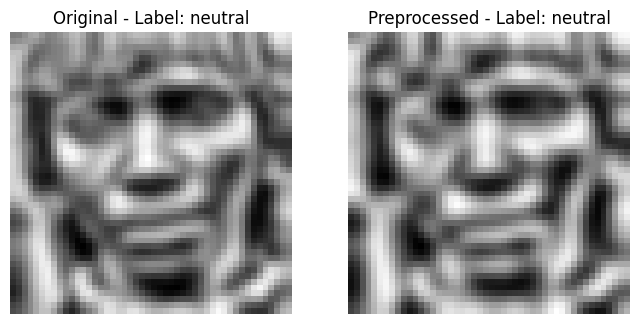

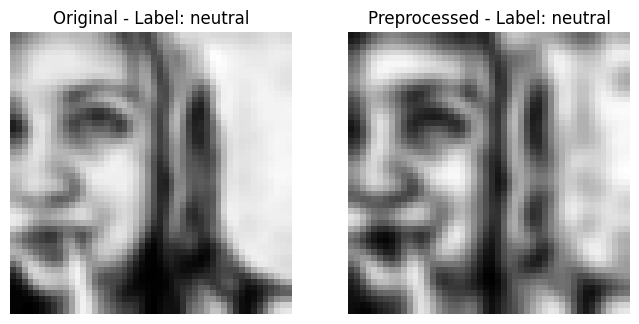

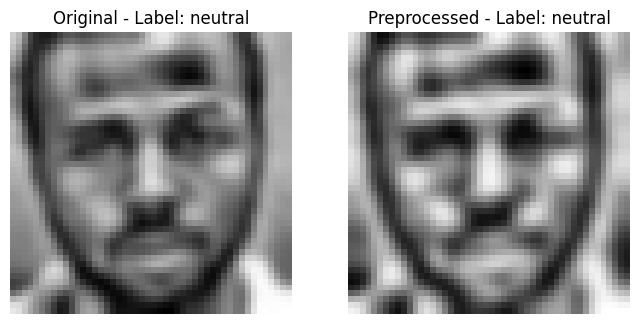

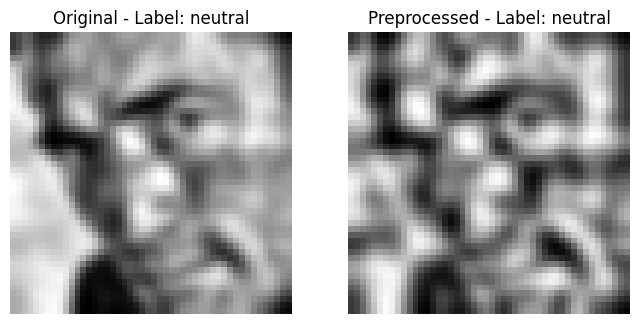

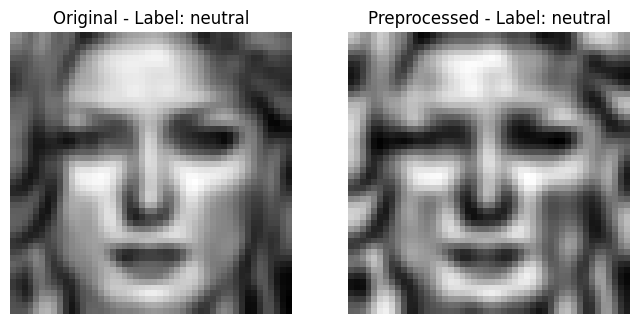

Testing preprocessing comparison on a few samples from the testing dataset...


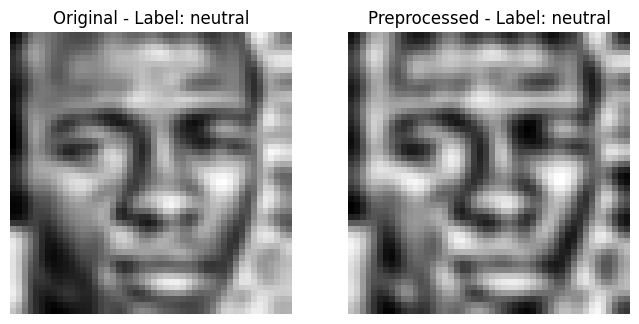

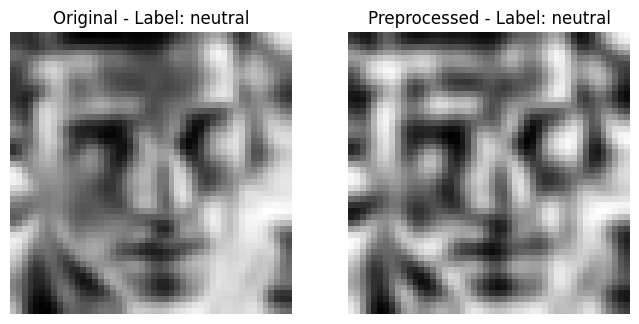

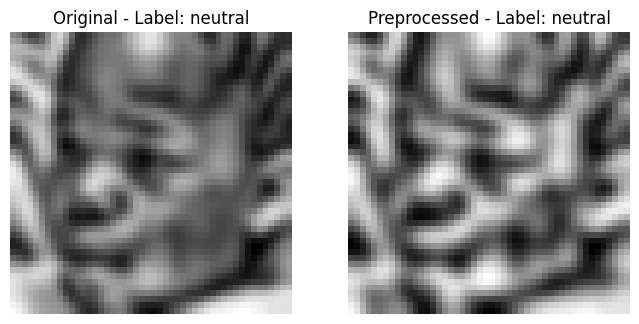

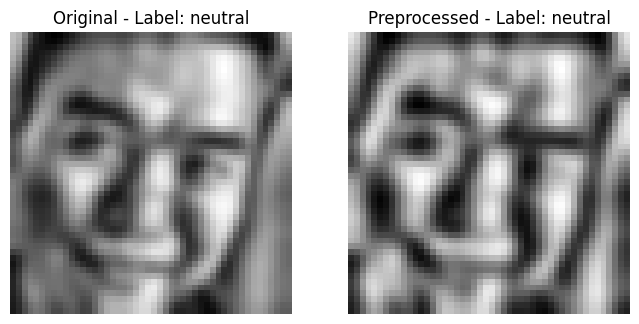

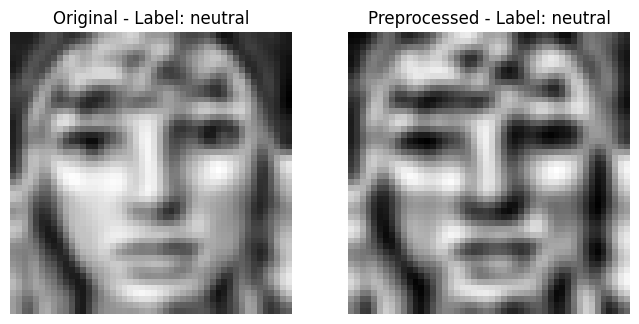

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def apply_clahe(img):
    """Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the image."""
    # Ensure the image is in grayscale (single-channel) and of type uint8
    img = np.uint8(img)  # Convert to uint8 if it's not already

    # Create the CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image
    return clahe.apply(img)

def denoise_image(img):
    """Apply a denoising filter (e.g., Gaussian blur) to the image."""
    return cv2.GaussianBlur(img, (5, 5), 0)

def apply_histogram_stretching(img):
    """Apply histogram stretching to enhance image contrast."""
    min_val = np.min(img)
    max_val = np.max(img)

    # Check if the image has no variance (min == max)
    if min_val == max_val:
        # If the image has no variance, return the original image
        # print("Warning: Image has no contrast, skipping histogram stretching.")
        return img

    return ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

def normalize_image(img):
    """Normalize the image to a range of [0, 255]."""
    return np.uint8(img)

def load_and_preprocess_images(folder_path):
    """Load and preprocess images from a given folder."""
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Preprocessing
                img = apply_clahe(img)  # Apply CLAHE
                img = denoise_image(img)  # Denoising
                img = apply_histogram_stretching(img)  # Histogram stretching
                img = normalize_image(img)  # Normalization

                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

def compare_before_after_preprocessing(img, preprocessed_img, label):
    """Compare an original image with its preprocessed version."""
    plt.figure(figsize=(8, 4))

    # Display the original image (before preprocessing)
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original - Label: {label}")
    plt.axis('off')

    # Display the preprocessed image (after preprocessing)
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title(f"Preprocessed - Label: {label}")
    plt.axis('off')

    plt.show()

def test_preprocessing_comparison(X, y, num_samples=5):
    """Test preprocessing by displaying original and preprocessed images side by side."""
    for i in range(num_samples):
        # Get the original image and its preprocessed version
        original_img = X[i]
        preprocessed_img = apply_clahe(original_img)  # Apply CLAHE as an example step
        preprocessed_img = denoise_image(preprocessed_img)  # Denoising
        preprocessed_img = apply_histogram_stretching(preprocessed_img)  # Histogram stretching
        preprocessed_img = normalize_image(preprocessed_img)  # Normalization

        # Display the comparison
        compare_before_after_preprocessing(original_img, preprocessed_img, y[i])

# Load and preprocess training and testing data
train_folder = '/content/train'
test_folder = '/content/test'


X_train, y_train = load_and_preprocess_images(train_folder)
X_test, y_test = load_and_preprocess_images(test_folder)

# Test the preprocessing comparison on a few samples from the training dataset
print("Testing preprocessing comparison on a few samples from the training dataset...")
test_preprocessing_comparison(X_train, y_train, num_samples=5)

# Test the preprocessing comparison on a few samples from the testing dataset (optional)
print("Testing preprocessing comparison on a few samples from the testing dataset...")
test_preprocessing_comparison(X_test, y_test, num_samples=5)


Loading and preprocessing training images...
Loading and preprocessing testing images...
Testing preprocessing comparison on training samples...


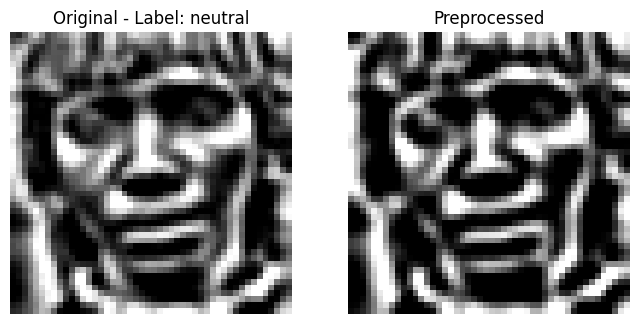

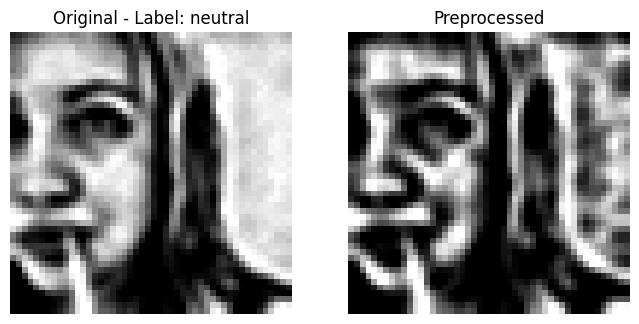

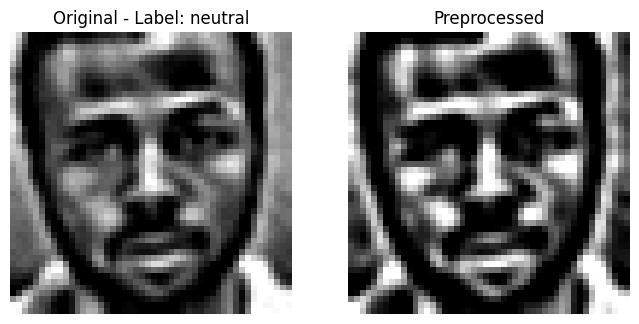

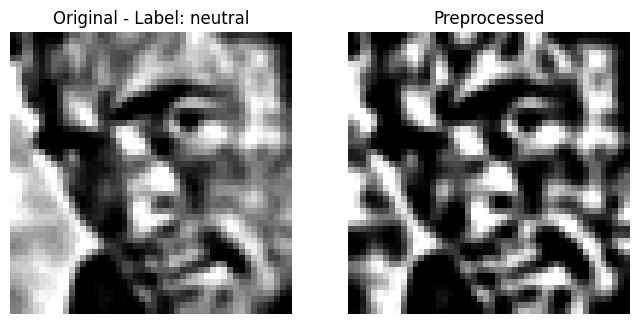

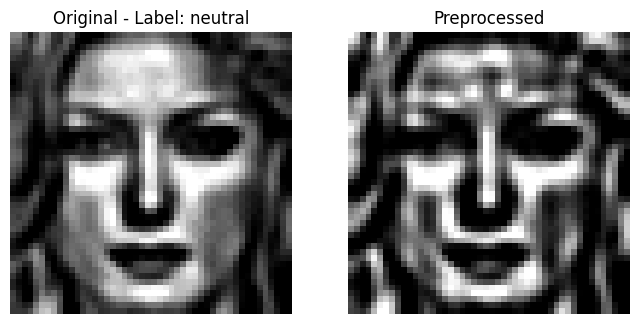

Testing preprocessing comparison on testing samples...


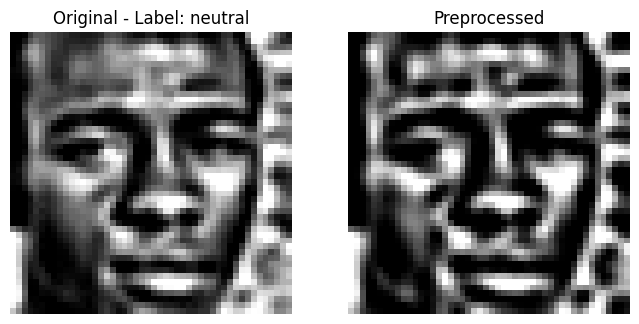

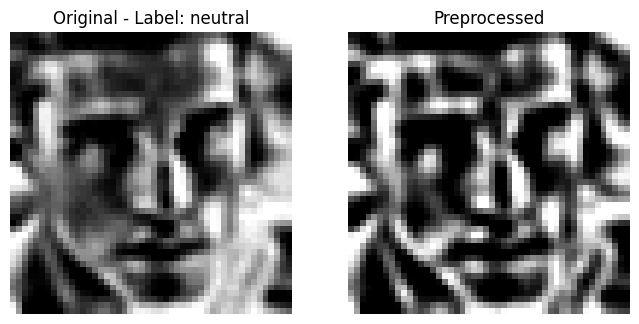

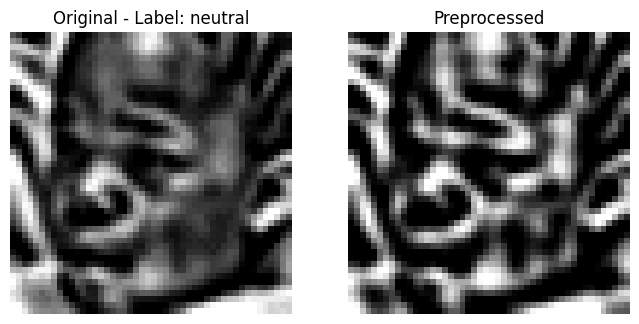

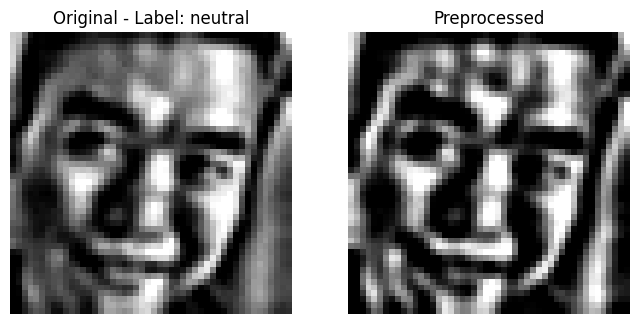

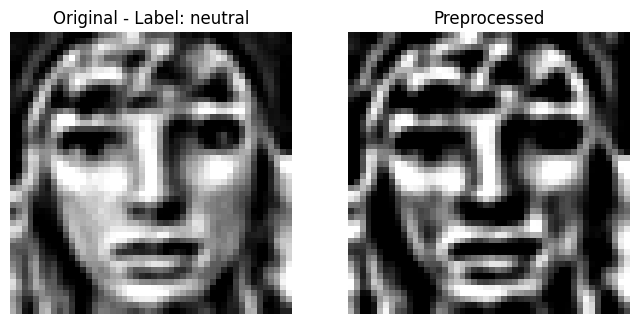

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def apply_clahe(img):
    """Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the image."""
    img = np.uint8(img)  # Ensure uint8
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(img)

def denoise_image(img):
    """Apply a denoising filter (Gaussian blur) to the image."""
    return cv2.GaussianBlur(img, (5, 5), 0)

def apply_histogram_stretching(img):
    """Apply histogram stretching to enhance image contrast."""
    min_val = np.min(img)
    max_val = np.max(img)
    if min_val == max_val:
        return img
    return ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

def normalize_image(img):
    """Normalize the image to a range of [0, 255] and ensure uint8 type."""
    return np.uint8(img)

def sharpen_image(img):
    """Sharpen the image using a kernel filter."""
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

def apply_gamma_correction(img, gamma=1.5):
    """Apply gamma correction to adjust brightness."""
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(np.clip(corrected * 255, 0, 255))

def load_and_preprocess_images(folder_path):
    """Load and preprocess images from a given folder."""
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is None:
                    print(f"Warning: Skipped unreadable image {img_path}")
                    continue

                # Preprocessing pipeline
                img = apply_clahe(img)
                img = denoise_image(img)
                img = apply_histogram_stretching(img)
                img = apply_gamma_correction(img, gamma=1.5)
                img = sharpen_image(img)
                img = normalize_image(img)

                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

def compare_before_after_preprocessing(img, preprocessed_img, label):
    """Compare an original image with its preprocessed version."""
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original - Label: {label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title("Preprocessed")
    plt.axis('off')

    plt.show()

def test_preprocessing_comparison(X, y, num_samples=5):
    """Display original and preprocessed images side by side."""
    for i in range(num_samples):
        original_img = X[i]

        preprocessed_img = apply_clahe(original_img)
        preprocessed_img = denoise_image(preprocessed_img)
        preprocessed_img = apply_histogram_stretching(preprocessed_img)
        preprocessed_img = apply_gamma_correction(preprocessed_img, gamma=1.5)
        preprocessed_img = sharpen_image(preprocessed_img)
        preprocessed_img = normalize_image(preprocessed_img)

        compare_before_after_preprocessing(original_img, preprocessed_img, y[i])

# --- MAIN EXECUTION ---

train_folder = '/content/train'
test_folder = '/content/test'


print("Loading and preprocessing training images...")
X_train, y_train = load_and_preprocess_images(train_folder)

print("Loading and preprocessing testing images...")
X_test, y_test = load_and_preprocess_images(test_folder)

print("Testing preprocessing comparison on training samples...")
test_preprocessing_comparison(X_train, y_train, num_samples=5)

print("Testing preprocessing comparison on testing samples...")
test_preprocessing_comparison(X_test, y_test, num_samples=5)
